# Analytical Alley Data Scientist Task
Georg Simmul

### Initial setup

Importing necessary packages.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
# Setting the plot size to be larger for better readablity
plt.rcParams['figure.figsize'] = [10, 5]

Reading data from excel and getting some feeling about the data.

In [71]:
# Reading data into pandas dataframe
xlsx = pd.ExcelFile('C:/Users/georgs/Downloads/AA DS Task/AA DS Task Dataset.xlsx')
df = pd.read_excel(xlsx, 'Data')

In [72]:
# Check that the data types are read correctly
df.dtypes

Date                            datetime64[ns]
Ticket Total Sales                     float64
 Jackpot (Mil €)                         int64
Stores                                   int64
TV Media                               float64
Outdoor Media                          float64
Print Media                            float64
New Store Openings                       int64
Friday 13th                              int64
National Internet proportion             int64
dtype: object

In [73]:
# Getting first feeling about data - looking at missing values, min, max and general distribution
df.describe()

,Ticket Total Sales,Jackpot (Mil €),Stores,TV Media,Outdoor Media,Print Media,New Store Openings,Friday 13th,National Internet proportion
count,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,3.791254e+06,39.747748,4762.945946,22822.890830,2383.122072,4999.533494,0.063063,0.031532,67.454955
std,1.612257e+06,32.558327,258.548098,28996.444621,8953.843475,23969.884383,0.662906,0.175144,0.858942
min,1.663031e+06,15.000000,3963.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000
25%,3.043159e+06,15.000000,4676.750000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
50%,3.527098e+06,27.000000,4763.500000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,3.923637e+06,52.000000,4976.750000,47314.309144,0.000000,0.000000,0.000000,0.000000,68.000000
max,1.405333e+07,183.000000,5243.000000,138013.384278,61618.000000,159607.729173,7.000000,1.000000,69.000000


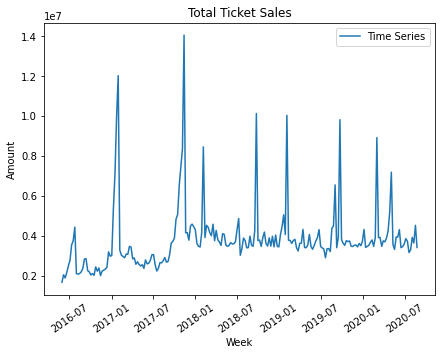

In [74]:
# Ploting label - Total Ticket Sales
df_trend = df[["Date","Ticket Total Sales"]]
df_trend.set_index("Date",inplace=True)
plt.figure(figsize=(7, 5))
plt.plot(df_trend, label='Time Series')
plt.title('Total Ticket Sales')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.xticks(rotation=35)
plt.legend()
plt.show()

### Analysing trend and seasonality

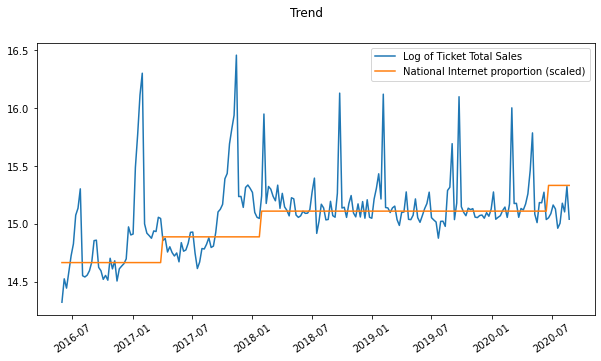

In [75]:
# Ploting logarithm of Ticket Total Sales and scaled National Internet Proportion
plt.xticks(rotation=35)
plt.plot(df["Date"],np.log(df["Ticket Total Sales"]), label = "Log of Ticket Total Sales")
plt.plot(df["Date"],df["National Internet proportion"]/4.5, label = "National Internet proportion (scaled)")
plt.suptitle('Trend')
plt.legend()

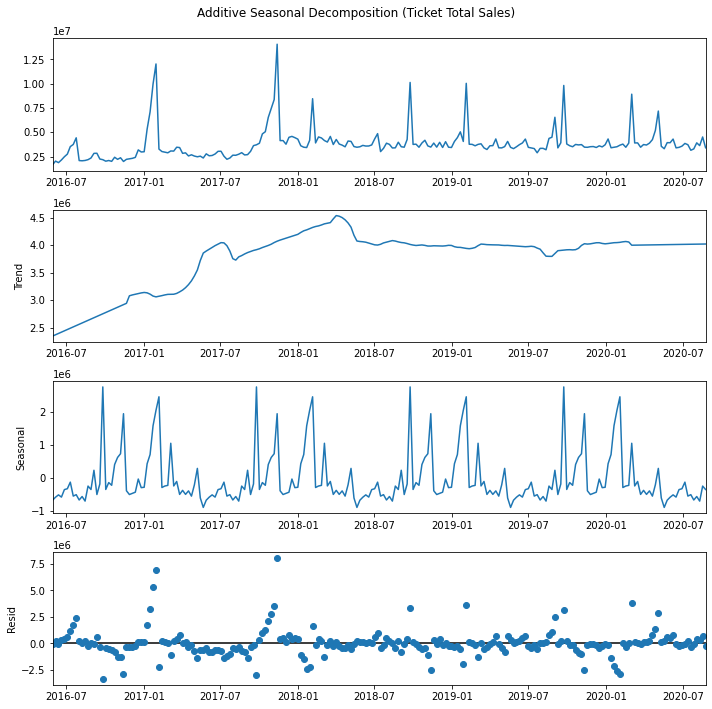

In [64]:
# Total Ticket Sales seasonal decomposition using additive model
df_trend = df[["Date","Ticket Total Sales"]].set_index("Date")
result = seasonal_decompose(df_trend,model='additive', extrapolate_trend='freq')#multiplicative
plt.rcParams['figure.figsize'] = [10, 10]
result.plot()
plt.suptitle('Additive Seasonal Decomposition (Ticket Total Sales)')
plt.tight_layout()
plt.show()

## Regression

Importing necessary packages for building the regression model.

In [47]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
# Definig function to use later for analysing model performance
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

(array([80.,  0.,  0.,  0.,  1., 10.,  9., 25.,  2.,  0.,  1.,  5.,  1.,
         3.,  8.,  3.,  8.,  4.,  1.,  1.,  0.,  2.,  4.,  5.,  1.,  8.,
         1.,  1.,  0.,  2.,  3.,  1.,  2.,  0.,  1.,  4.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 15.  ,  16.68,  18.36,  20.04,  21.72,  23.4 ,  25.08,  26.76,
         28.44,  30.12,  31.8 ,  33.48,  35.16,  36.84,  38.52,  40.2 ,
         41.88,  43.56,  45.24,  46.92,  48.6 ,  50.28,  51.96,  53.64,
         55.32,  57.  ,  58.68,  60.36,  62.04,  63.72,  65.4 ,  67.08,
         68.76,  70.44,  72.12,  73.8 ,  75.48,  77.16,  78.84,  80.52,
         82.2 ,  83.88,  85.56,  87.24,  88.92,  90.6 ,  92.28,  93.96,
  

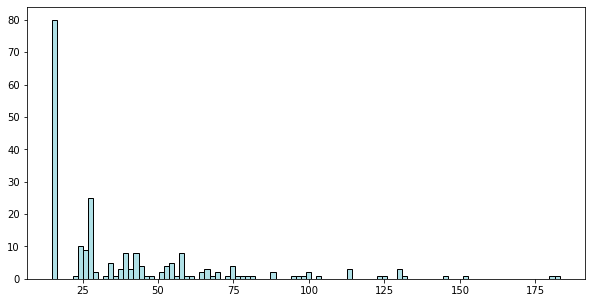

In [76]:
# Ploting jackpot size as a histogram to get better undesrtanding of its distribution
plt.hist(df[" Jackpot (Mil €)"], bins=100, color='powderblue', edgecolor='black')

### Preparing data for training (Reg)

Initially, this was a cell where I tested with different feature engineering. Most of it went unused. Comment `#DROP` was used to mark features that didn't seem to have much descriptive power, altough it shouldn't be used to determine that the feature wasn't used in the final model. More as note for myself.
This part was later wrapped in function so it would be easer to run the model for any changed dataframe.

In [50]:
def calc_Xy(df):
    
    # Setting date aside. This will be returned for easier plotting if the argument df doesn't include the whole time provided
    dates = df[["Date"]]
    
    # Assigning features to X
    X = df[[" Jackpot (Mil €)","Stores","TV Media","Outdoor Media","Print Media","New Store Openings","Friday 13th","National Internet proportion"]]
    
    # Scaling features to more common scale 
    X["Jackpot"] = X[" Jackpot (Mil €)"]*1000000
    X["New Store Openings"] = X["New Store Openings"]/7

    # Testing different kinds of feature combinations
    X["Jackpot x TV"] = np.sqrt(X["Jackpot"] * X["TV Media"]) #DROP
    X["Jackpot x Outdoor"] = np.sqrt(X["Jackpot"] * X["Outdoor Media"]) #DROP
    X["Jackpot x Print"] = np.sqrt(X["Jackpot"] * X["Print Media"]) #DROP

    X['lead1w TV'] = X['TV Media'].shift(1).fillna(0) #DROP
    X['lead1w Outdoor'] = X['Outdoor Media'].shift(1).fillna(0)
    X['lead1w Print'] = X['Print Media'].shift(1).fillna(0) #DROP

    X["lead1m TV"] = X['TV Media'].shift(2).rolling(4, min_periods=1).sum().fillna(0) #DROP
    X["lead1m Outdoor"] = X['Outdoor Media'].shift(2).rolling(4, min_periods=1).sum().fillna(0) #DROP
    X["lead1m Print"] = X['Print Media'].shift(2).rolling(4, min_periods=1).sum().fillna(0) #DROP

    X["Stores x Print"] = np.sqrt(X["Stores"] * X["Print Media"])
    X["Stores x TV"] = np.sqrt(X["Stores"] * X["TV Media"]) #NEW
    X["Stores x Outdoor"] = np.sqrt(X["Stores"] * X["Outdoor Media"]) #NEW #DROP

    X["Stores x NIP"] = np.sqrt(X["Stores"] * X["National Internet proportion"]) #DROP

    X["Outdoor x TV"] = np.sqrt(X["Outdoor Media"] * X["TV Media"]) #DROP
    X["Print x Outdoor"] = np.sqrt(X["Print Media"] * X["Outdoor Media"]) #DROP
    X["TV x Print"] = np.sqrt(X["TV Media"] * X["Print Media"]) #DROP
    
    # As there seemed to be non-linear relation between Jackpot and label Ticket Total Sales, it seemed good to bin jackpot 
    # values, adding the number of bins as a kind of hyper parameter.
    num_bins = 10
    max_jp = max(X[" Jackpot (Mil €)"])
    step = int(round(max_jp/num_bins,0))

    for x in range(0,max_jp,step):
        X["Jackpot {}".format(x)] = ((x<X[" Jackpot (Mil €)"])*(X[" Jackpot (Mil €)"]<=x+step)).astype(int)*X["Jackpot"]
        
        # Under this for-loop I tested also feature combinations with each or some bins 
        # (better or more general solution was used for random forest model below)
        
        #if x in [72,108]: #DROP 90, 54
        #    X["Jackpot {} x Print".format(x)] = np.sqrt(X["Jackpot {}".format(x)] * X["Print Media"])
        #if x in [162]: #DROP 180
        #    X["Jackpot {} x TV".format(x)] = np.sqrt(X["Jackpot {}".format(x)] * X["TV Media"])
        #if x in [18,54,126,144]:
        #    X["Jackpot {} x Outdoor".format(x)] = np.sqrt(X["Jackpot {}".format(x)] * X["Outdoor Media"])

    X["Last week ticket sales"] = df[["Ticket Total Sales"]].shift(1).fillna(0)

    X["Jackpot x lead1w TV"] = np.sqrt(X["Jackpot"] * X["lead1w TV"]) #NEW #DROP
    X["Jackpot x lead1w Outdoor"] = np.sqrt(X["Jackpot"] * X["lead1w Outdoor"]) #NEW #DROP
    X["Jackpot x lead1w Print"] = np.sqrt(X["Jackpot"] * X["lead1w Print"]) #NEW #DROP

    X["Jackpot x lead1m TV"] = np.sqrt(X["Jackpot"] * X["lead1m TV"]) #NEW #DROP
    X["Jackpot x lead1m Outdoor"] = np.sqrt(X["Jackpot"] * X["lead1m Outdoor"]) #NEW #DROP
    X["Jackpot x lead1m Print"] = np.sqrt(X["Jackpot"] * X["lead1m Print"]) #NEW #DROP

    X["Outdoor x lead1w TV"] = np.sqrt(X["Outdoor Media"] * X["lead1w TV"]) #NEW #DROP
    X["Print x lead1w TV"] = np.sqrt(X["Print Media"] * X["lead1w TV"]) #NEW #DROP
    X["TV x lead1w Outdoor"] = np.sqrt(X["TV Media"] * X["lead1w Outdoor"]) #NEW #DROP
    X["Print x lead1w Outdoor"] = np.sqrt(X["Print Media"] * X["lead1w Outdoor"]) #NEW #DROP
    X["TV x lead1w Print"] = np.sqrt(X["TV Media"] * X["lead1w Print"]) #NEW #DROP
    X["Outdoor x lead1w Print"] = np.sqrt(X["Outdoor Media"] * X["lead1w Print"]) #NEW #DROP

    X["NSO x Print"] = np.sqrt(X["New Store Openings"] * X["Print Media"]) #DROP
    X["NSO x TV"] = np.sqrt(X["New Store Openings"] * X["TV Media"]) #DROP
    X["NSO x Outdoor"] = np.sqrt(X["New Store Openings"] * X["Outdoor Media"]) #DROP

    X["F13 x Print"] = np.sqrt(X["Friday 13th"] * X["Print Media"])
    X["F13 x TV"] = np.sqrt(X["Friday 13th"] * X["TV Media"]) #DROP
    X["F13 x Outdoor"] = np.sqrt(X["Friday 13th"] * X["Outdoor Media"]) #DROP

    X["NIP x Print"] = np.sqrt(X["National Internet proportion"] * X["Print Media"])
    X["NIP x TV"] = np.sqrt(X["National Internet proportion"] * X["TV Media"]) #DROP
    X["NIP x Outdoor"] = np.sqrt(X["National Internet proportion"] * X["Outdoor Media"]) #DROP

    # Remove features not used in any particular run (instead of deleting the code above)
    X = X.drop(columns=[" Jackpot (Mil €)",
                        "Jackpot x lead1m Print","lead1m Outdoor","Stores x Outdoor","TV x Print","TV Media",
                        "lead1m TV","Jackpot x lead1m TV","Jackpot x lead1w TV","Jackpot x Outdoor",
                        "Outdoor x lead1w TV","Outdoor Media","Print x Outdoor","Jackpot x lead1m Outdoor","Jackpot x TV",
                        "Jackpot x lead1w Outdoor","Print x lead1w Outdoor","lead1m Print","Outdoor x lead1w Print",'lead1w Print',
                        "TV x lead1w Print","NSO x Print","F13 x Outdoor","NIP x TV","Print Media",
                        #"NIP x Outdoor","Stores x NIP","Jackpot x Print","Outdoor x TV","F13 x TV",
                        #"NSO x Outdoor","TV x lead1w Outdoor","Print x lead1w TV","Jackpot x lead1w Print",
                        #'lead1w TV',"NSO x TV"
                        "Print x lead1w TV"
                       ])
    
    # Assigning label to y
    y = df[["Ticket Total Sales"]]
    
    return X,y,dates

# Calculate X, y and dates for initial dataframe
X,y,dates = calc_Xy(df)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/2604355467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Jackpot"] = X[" Jackpot (Mil €)"]*1000000
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/2604355467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["New Store Openings"] = X["New Store Openings"]/7


In [51]:
# Getting some feeling for the features the model is going to be trained on
X.describe()

,Stores,New Store Openings,Friday 13th,National Internet proportion,Jackpot,Jackpot x Print,lead1w TV,lead1w Outdoor,Stores x Print,Stores x TV,...,Jackpot 180,Last week ticket sales,Jackpot x lead1w Print,TV x lead1w Outdoor,NSO x TV,NSO x Outdoor,F13 x Print,F13 x TV,NIP x Print,NIP x Outdoor
count,222.000000,222.000000,222.000000,222.000000,2.220000e+02,2.220000e+02,222.000000,222.000000,222.000000,222.000000,...,2.220000e+02,2.220000e+02,2.220000e+02,222.000000,222.0,222.000000,222.0,222.000000,222.000000,222.000000
mean,4762.945946,0.009009,0.031532,67.454955,3.974775e+07,1.361378e+05,22818.866143,2383.122072,1133.583280,6845.937490,...,8.243243e+05,3.775907e+06,9.923338e+04,885.913543,0.0,0.643056,0.0,1.515810,135.313315,120.351093
std,258.548098,0.094701,0.175144,0.858942,3.255833e+07,6.560119e+05,28999.564021,8953.843475,4764.105879,7826.395063,...,1.228216e+07,1.632026e+06,4.530067e+05,4595.946557,0.0,9.581326,0.0,15.960968,567.157477,383.388057
min,3963.000000,0.000000,0.000000,66.000000,1.500000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,4676.750000,0.000000,0.000000,67.000000,1.500000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.037750e+06,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,4763.500000,0.000000,0.000000,68.000000,2.700000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.527098e+06,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,4976.750000,0.000000,0.000000,68.000000,5.200000e+07,0.000000e+00,47314.309144,0.000000,0.000000,14982.046702,...,0.000000e+00,3.923637e+06,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
max,5243.000000,1.000000,1.000000,69.000000,1.830000e+08,5.172949e+06,138013.384278,61618.000000,27453.008891,24284.381627,...,1.830000e+08,1.405333e+07,4.555108e+06,33175.759601,0.0,142.758537,0.0,178.027018,3294.438584,2046.954811


In [52]:
X.head(10)

,Stores,New Store Openings,Friday 13th,National Internet proportion,Jackpot,Jackpot x Print,lead1w TV,lead1w Outdoor,Stores x Print,Stores x TV,...,Jackpot 180,Last week ticket sales,Jackpot x lead1w Print,TV x lead1w Outdoor,NSO x TV,NSO x Outdoor,F13 x Print,F13 x TV,NIP x Print,NIP x Outdoor
0,5132,0.0,0,66,23000000,0.0,0.000000,0.0,0.0,0.000000,...,0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5137,0.0,0,66,32000000,0.0,0.000000,0.0,0.0,20010.775266,...,0,1.663031e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5156,0.0,0,66,42000000,0.0,77950.384807,0.0,0.0,0.000000,...,0,2.035883e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5114,0.0,0,66,51000000,0.0,0.000000,0.0,0.0,20300.729382,...,0,1.878669e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5175,0.0,0,66,62000000,0.0,80586.549361,0.0,0.0,0.000000,...,0,2.155037e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5067,0.0,0,66,69000000,0.0,0.000000,0.0,0.0,0.000000,...,0,2.484725e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5064,0.0,0,66,81000000,0.0,0.000000,0.0,0.0,10214.992262,...,0,2.753530e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4967,0.0,0,66,96000000,0.0,20605.463450,0.0,0.0,0.000000,...,0,3.527380e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4773,0.0,0,66,113000000,0.0,0.000000,0.0,0.0,0.000000,...,0,3.745780e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4900,0.0,0,66,15000000,0.0,0.000000,0.0,0.0,0.000000,...,0,4.428456e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Spliting data into train and test set. Setting aside 20% of the last rows for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Scaling features with large values/variability to have roughly mean value 0 and standard deviation of 1. Also, scaling the label.

In [95]:
# Definig features that don't need to be scaled as most do (and those were mostly the ones moving in and out)
passthrough = ["New Store Openings","Friday 13th"]
features_to_scale = [i for i in X.columns.tolist() if i not in passthrough]

preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), features_to_scale),
        #("minmax", MinMaxScaler(), minmax),
        #("OHE", OneHotEncoder(sparse_output=False), ["type"]), #OHE for type
        ("passthrough", "passthrough", passthrough) #Attributes that don't need to be changed
    ],
    remainder="drop" #If still any unneeded attributes remain, they will be discarded here
)#.set_output(transform="pandas")

# Fit the transformer for training data and also transform
X_train_transformed = preprocessor.fit_transform(X_train)
# Change into pandas data frame
X_train_transformed = pd.DataFrame( X_train_transformed, columns = features_to_scale + passthrough)

In [55]:
"""
Scaling the label.
I used older version of scipy so the inverse trandformation didn't exist 
(as well as for example set_output() in above cell). So it was easier to define these 
tranformations explicitly.
"""
mean_y_train = np.mean(y_train)
std_y_train = np.std(y_train)

def transform_y(y_train):
    return (y_train-mean_y_train)/std_y_train


def inv_transform_y(y_train_tsf):
    return y_train_tsf*std_y_train+mean_y_train

y_train_tsf = transform_y(y_train)

### Defining the model (Reg)

In this section my formating wasn't the best so you can see some commented sections or cells where I used deeper. Also, different hyper-parameters aren't well logged.

In [56]:
# Defining the model structure, here using linear regression
def uncompiled_model(feature_num):
    inputs = tf.keras.Input(shape=(feature_num,))
    outputs = tf.keras.layers.Dense(1,activation = "linear")(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="Reg")
    
    return(model)

#def uncompiled_model(feature_num):
#    inputs = tf.keras.Input(shape=(feature_num,))
#    layer1 = tf.keras.layers.Dense(feature_num,activation = "ReLU",kernel_regularizer=tf.keras.regularizers.l1(0.01))(inputs) #First inner layer has the same number of nodes as input layer
#    layer2 = tf.keras.layers.Dense(feature_num,activation = "ReLU",kernel_regularizer=tf.keras.regularizers.l1(0.01))(layer1) #Second inner layer has the same number of nodes as first
#    layer3 = tf.keras.layers.Dense(round(feature_num/2,0),activation = "ReLU",kernel_regularizer=tf.keras.regularizers.l1(0.01))(layer2) #Thrird inner layer has half of the nodes as first
#    outputs = tf.keras.layers.Dense(1,activation = "linear")(layer3) #Output layer uses linear function
#    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="NNmodel")
#    
#    return(model)

In [57]:
# Defining the model, using number of features as input
Reg = uncompiled_model(X_train_transformed.shape[1])

In [58]:
# Printing model structure
Reg.summary()

Model: "Reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Setting model loss and optimizer. I tested with different metrics as well, 
# but in the end I didn't find much use for recording those in addition to loss
Reg.compile(
    loss=tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size", name="mean_squared_error"),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0004)
)

### Model training (Reg)

In [60]:
# Fit model to the training data, setting 20% aside for validation (taken again from last records)
history = Reg.fit(X_train_transformed, y_train_tsf,
                           batch_size=64, epochs=5000, validation_split=0.2)

Epoch 1/5000

3/3 [==============================] - 1s 129ms/step - loss: 2.9126 - val_loss: 1.5712
Epoch 2/5000
3/3 [==============================] - 0s 21ms/step - loss: 2.8892 - val_loss: 1.5548
Epoch 3/5000
3/3 [==============================] - 0s 24ms/step - loss: 2.8681 - val_loss: 1.5383
Epoch 4/5000
3/3 [==============================] - 0s 27ms/step - loss: 2.8448 - val_loss: 1.5224
Epoch 5/5000
3/3 [==============================] - 0s 24ms/step - loss: 2.8231 - val_loss: 1.5068
Epoch 6/5000
3/3 [==============================] - 0s 36ms/step - loss: 2.8011 - val_loss: 1.4915
Epoch 7/5000
3/3 [==============================] - 0s 34ms/step - loss: 2.7808 - val_loss: 1.4766
Epoch 8/5000
3/3 [==============================] - 0s 16ms/step - loss: 2.7594 - val_loss: 1.4621
Epoch 9/5000
3/3 [==============================] - 0s 26ms/step - loss: 2.7393 - val_loss: 1.4477
Epoch 10/5000
3/3 [==============================] - 0s 29ms/step - loss: 2.7187 - val_loss: 1.4331
Epoch 1

Epoch 81/5000
3/3 [==============================] - 0s 20ms/step - loss: 1.5642 - val_loss: 0.6988
Epoch 82/5000
3/3 [==============================] - 0s 16ms/step - loss: 1.5525 - val_loss: 0.6918
Epoch 83/5000
3/3 [==============================] - 0s 23ms/step - loss: 1.5411 - val_loss: 0.6847
Epoch 84/5000
3/3 [==============================] - 0s 23ms/step - loss: 1.5273 - val_loss: 0.6777
Epoch 85/5000
3/3 [==============================] - 0s 28ms/step - loss: 1.5152 - val_loss: 0.6699
Epoch 86/5000
3/3 [==============================] - 0s 17ms/step - loss: 1.5024 - val_loss: 0.6625
Epoch 87/5000
3/3 [==============================] - 0s 22ms/step - loss: 1.4899 - val_loss: 0.6557
Epoch 88/5000
3/3 [==============================] - 0s 24ms/step - loss: 1.4786 - val_loss: 0.6492
Epoch 89/5000
3/3 [==============================] - 0s 25ms/step - loss: 1.4665 - val_loss: 0.6431
Epoch 90/5000
3/3 [==============================] - 0s 23ms/step - loss: 1.4559 - val_loss: 0.6372


3/3 [==============================] - 0s 25ms/step - loss: 0.8755 - val_loss: 0.3436
Epoch 163/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.8697 - val_loss: 0.3413
Epoch 164/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.8648 - val_loss: 0.3388
Epoch 165/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.8589 - val_loss: 0.3365
Epoch 166/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.8531 - val_loss: 0.3341
Epoch 167/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.8484 - val_loss: 0.3317
Epoch 168/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.8423 - val_loss: 0.3294
Epoch 169/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.8372 - val_loss: 0.3270
Epoch 170/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.8315 - val_loss: 0.3246
Epoch 171/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.8262 - val_loss: 0.3222
Epoch

3/3 [==============================] - 0s 27ms/step - loss: 0.5140 - val_loss: 0.2002
Epoch 244/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.5111 - val_loss: 0.1990
Epoch 245/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.5082 - val_loss: 0.1979
Epoch 246/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.5052 - val_loss: 0.1968
Epoch 247/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.5025 - val_loss: 0.1957
Epoch 248/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.4992 - val_loss: 0.1946
Epoch 249/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.4967 - val_loss: 0.1936
Epoch 250/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.4933 - val_loss: 0.1924
Epoch 251/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.4903 - val_loss: 0.1913
Epoch 252/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.4872 - val_loss: 0.1901
Epoch

3/3 [==============================] - 0s 23ms/step - loss: 0.3195 - val_loss: 0.1271
Epoch 325/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.3180 - val_loss: 0.1264
Epoch 326/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.3163 - val_loss: 0.1256
Epoch 327/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.3145 - val_loss: 0.1249
Epoch 328/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.3128 - val_loss: 0.1242
Epoch 329/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.3110 - val_loss: 0.1235
Epoch 330/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.3094 - val_loss: 0.1229
Epoch 331/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.3078 - val_loss: 0.1222
Epoch 332/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.3060 - val_loss: 0.1216
Epoch 333/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.3045 - val_loss: 0.1210
Epoch

3/3 [==============================] - 0s 20ms/step - loss: 0.2091 - val_loss: 0.0824
Epoch 406/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.2081 - val_loss: 0.0819
Epoch 407/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.2069 - val_loss: 0.0814
Epoch 408/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.2059 - val_loss: 0.0809
Epoch 409/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.2047 - val_loss: 0.0803
Epoch 410/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.2038 - val_loss: 0.0798
Epoch 411/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.2028 - val_loss: 0.0794
Epoch 412/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.2017 - val_loss: 0.0790
Epoch 413/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.2008 - val_loss: 0.0788
Epoch 414/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.1996 - val_loss: 0.0787
Epoch

3/3 [==============================] - 0s 14ms/step - loss: 0.1449 - val_loss: 0.0580
Epoch 487/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.1444 - val_loss: 0.0578
Epoch 488/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.1438 - val_loss: 0.0575
Epoch 489/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.1433 - val_loss: 0.0571
Epoch 490/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.1428 - val_loss: 0.0567
Epoch 491/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.1423 - val_loss: 0.0563
Epoch 492/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.1418 - val_loss: 0.0560
Epoch 493/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.1413 - val_loss: 0.0558
Epoch 494/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.1408 - val_loss: 0.0555
Epoch 495/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.1403 - val_loss: 0.0553
Epoch

3/3 [==============================] - 0s 16ms/step - loss: 0.1096 - val_loss: 0.0420
Epoch 568/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.1093 - val_loss: 0.0419
Epoch 569/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.1090 - val_loss: 0.0417
Epoch 570/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.1087 - val_loss: 0.0415
Epoch 571/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.1083 - val_loss: 0.0414
Epoch 572/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.1081 - val_loss: 0.0412
Epoch 573/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.1077 - val_loss: 0.0411
Epoch 574/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.1074 - val_loss: 0.0410
Epoch 575/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.1071 - val_loss: 0.0409
Epoch 576/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.1069 - val_loss: 0.0409
Epoch

3/3 [==============================] - 0s 22ms/step - loss: 0.0860 - val_loss: 0.0347
Epoch 649/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0857 - val_loss: 0.0346
Epoch 650/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0855 - val_loss: 0.0345
Epoch 651/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0853 - val_loss: 0.0345
Epoch 652/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0851 - val_loss: 0.0345
Epoch 653/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0849 - val_loss: 0.0344
Epoch 654/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0847 - val_loss: 0.0343
Epoch 655/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0845 - val_loss: 0.0342
Epoch 656/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0842 - val_loss: 0.0341
Epoch 657/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0840 - val_loss: 0.0340
Epoch

3/3 [==============================] - 0s 21ms/step - loss: 0.0724 - val_loss: 0.0324
Epoch 730/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0723 - val_loss: 0.0323
Epoch 731/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0722 - val_loss: 0.0324
Epoch 732/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0721 - val_loss: 0.0324
Epoch 733/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0720 - val_loss: 0.0323
Epoch 734/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0718 - val_loss: 0.0323
Epoch 735/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0717 - val_loss: 0.0323
Epoch 736/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0716 - val_loss: 0.0322
Epoch 737/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0715 - val_loss: 0.0321
Epoch 738/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0714 - val_loss: 0.0319
Epoch

3/3 [==============================] - 0s 25ms/step - loss: 0.0637 - val_loss: 0.0284
Epoch 811/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0636 - val_loss: 0.0284
Epoch 812/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0636 - val_loss: 0.0284
Epoch 813/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0635 - val_loss: 0.0283
Epoch 814/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0634 - val_loss: 0.0282
Epoch 815/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0633 - val_loss: 0.0282
Epoch 816/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0632 - val_loss: 0.0281
Epoch 817/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0631 - val_loss: 0.0281
Epoch 818/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0630 - val_loss: 0.0280
Epoch 819/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0630 - val_loss: 0.0279
Epoch

3/3 [==============================] - 0s 24ms/step - loss: 0.0581 - val_loss: 0.0273
Epoch 892/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0581 - val_loss: 0.0273
Epoch 893/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0580 - val_loss: 0.0273
Epoch 894/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0579 - val_loss: 0.0274
Epoch 895/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0579 - val_loss: 0.0275
Epoch 896/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0578 - val_loss: 0.0276
Epoch 897/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0578 - val_loss: 0.0275
Epoch 898/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0577 - val_loss: 0.0275
Epoch 899/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0577 - val_loss: 0.0274
Epoch 900/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0576 - val_loss: 0.0274
Epoch

3/3 [==============================] - 0s 23ms/step - loss: 0.0541 - val_loss: 0.0269
Epoch 973/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0541 - val_loss: 0.0271
Epoch 974/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0541 - val_loss: 0.0272
Epoch 975/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0540 - val_loss: 0.0272
Epoch 976/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0540 - val_loss: 0.0273
Epoch 977/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0540 - val_loss: 0.0273
Epoch 978/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0539 - val_loss: 0.0274
Epoch 979/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0539 - val_loss: 0.0274
Epoch 980/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0539 - val_loss: 0.0275
Epoch 981/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0538 - val_loss: 0.0276
Epoch

3/3 [==============================] - 0s 17ms/step - loss: 0.0517 - val_loss: 0.0269
Epoch 1053/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0517 - val_loss: 0.0269
Epoch 1054/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0517 - val_loss: 0.0269
Epoch 1055/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0516 - val_loss: 0.0269
Epoch 1056/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0516 - val_loss: 0.0270
Epoch 1057/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0516 - val_loss: 0.0271
Epoch 1058/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0516 - val_loss: 0.0272
Epoch 1059/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0516 - val_loss: 0.0272
Epoch 1060/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0515 - val_loss: 0.0273
Epoch 1061/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0515 - val_loss: 0.0

3/3 [==============================] - 0s 27ms/step - loss: 0.0500 - val_loss: 0.0278
Epoch 1133/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0500 - val_loss: 0.0278
Epoch 1134/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0500 - val_loss: 0.0278
Epoch 1135/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0500 - val_loss: 0.0277
Epoch 1136/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0499 - val_loss: 0.0276
Epoch 1137/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0499 - val_loss: 0.0275
Epoch 1138/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0499 - val_loss: 0.0274
Epoch 1139/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0499 - val_loss: 0.0273
Epoch 1140/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0499 - val_loss: 0.0271
Epoch 1141/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0498 - val_loss: 0.0

3/3 [==============================] - 0s 23ms/step - loss: 0.0489 - val_loss: 0.0268
Epoch 1213/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0489 - val_loss: 0.0269
Epoch 1214/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0489 - val_loss: 0.0270
Epoch 1215/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0489 - val_loss: 0.0271
Epoch 1216/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0489 - val_loss: 0.0273
Epoch 1217/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0489 - val_loss: 0.0273
Epoch 1218/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0489 - val_loss: 0.0274
Epoch 1219/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0489 - val_loss: 0.0275
Epoch 1220/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0488 - val_loss: 0.0275
Epoch 1221/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0488 - val_loss: 0.0

3/3 [==============================] - 0s 18ms/step - loss: 0.0483 - val_loss: 0.0274
Epoch 1293/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0483 - val_loss: 0.0273
Epoch 1294/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0483 - val_loss: 0.0272
Epoch 1295/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0483 - val_loss: 0.0271
Epoch 1296/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0483 - val_loss: 0.0270
Epoch 1297/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0483 - val_loss: 0.0269
Epoch 1298/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0483 - val_loss: 0.0269
Epoch 1299/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0482 - val_loss: 0.0268
Epoch 1300/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0482 - val_loss: 0.0268
Epoch 1301/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0482 - val_loss: 0.0

3/3 [==============================] - 0s 24ms/step - loss: 0.0479 - val_loss: 0.0277
Epoch 1373/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0479 - val_loss: 0.0278
Epoch 1374/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1375/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1376/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1377/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1378/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1379/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1380/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.0479 - val_loss: 0.0279
Epoch 1381/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0479 - val_loss: 0.0

3/3 [==============================] - 0s 31ms/step - loss: 0.0477 - val_loss: 0.0278
Epoch 1453/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0477 - val_loss: 0.0278
Epoch 1454/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0477 - val_loss: 0.0276
Epoch 1455/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0477 - val_loss: 0.0275
Epoch 1456/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0477 - val_loss: 0.0274
Epoch 1457/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0477 - val_loss: 0.0274
Epoch 1458/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0477 - val_loss: 0.0274
Epoch 1459/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0477 - val_loss: 0.0274
Epoch 1460/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0477 - val_loss: 0.0273
Epoch 1461/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0477 - val_loss: 0.0

3/3 [==============================] - 0s 24ms/step - loss: 0.0475 - val_loss: 0.0284
Epoch 1533/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0476 - val_loss: 0.0283
Epoch 1534/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0475 - val_loss: 0.0283
Epoch 1535/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0475 - val_loss: 0.0284
Epoch 1536/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0475 - val_loss: 0.0283
Epoch 1537/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0475 - val_loss: 0.0283
Epoch 1538/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0475 - val_loss: 0.0282
Epoch 1539/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0475 - val_loss: 0.0281
Epoch 1540/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0475 - val_loss: 0.0281
Epoch 1541/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0475 - val_loss: 0.0

3/3 [==============================] - 0s 29ms/step - loss: 0.0474 - val_loss: 0.0276
Epoch 1613/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0474 - val_loss: 0.0275
Epoch 1614/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0474 - val_loss: 0.0273
Epoch 1615/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0474 - val_loss: 0.0271
Epoch 1616/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0474 - val_loss: 0.0271
Epoch 1617/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0474 - val_loss: 0.0271
Epoch 1618/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0474 - val_loss: 0.0271
Epoch 1619/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0474 - val_loss: 0.0271
Epoch 1620/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0473 - val_loss: 0.0271
Epoch 1621/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0473 - val_loss: 0.0

3/3 [==============================] - 0s 26ms/step - loss: 0.0474 - val_loss: 0.0272
Epoch 1693/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0474 - val_loss: 0.0272
Epoch 1694/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0474 - val_loss: 0.0272
Epoch 1695/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0474 - val_loss: 0.0273
Epoch 1696/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0474 - val_loss: 0.0274
Epoch 1697/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0474 - val_loss: 0.0274
Epoch 1698/5000
3/3 [==============================] - 0s 43ms/step - loss: 0.0474 - val_loss: 0.0275
Epoch 1699/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0473 - val_loss: 0.0276
Epoch 1700/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0473 - val_loss: 0.0277
Epoch 1701/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0473 - val_loss: 0.0

3/3 [==============================] - 0s 30ms/step - loss: 0.0471 - val_loss: 0.0283
Epoch 1773/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0471 - val_loss: 0.0284
Epoch 1774/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0471 - val_loss: 0.0285
Epoch 1775/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0471 - val_loss: 0.0287
Epoch 1776/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0471 - val_loss: 0.0288
Epoch 1777/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0471 - val_loss: 0.0289
Epoch 1778/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0471 - val_loss: 0.0290
Epoch 1779/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0471 - val_loss: 0.0292
Epoch 1780/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0471 - val_loss: 0.0294
Epoch 1781/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0471 - val_loss: 0.0

3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - val_loss: 0.0279
Epoch 1853/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - val_loss: 0.0279
Epoch 1854/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0471 - val_loss: 0.0278
Epoch 1855/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0471 - val_loss: 0.0277
Epoch 1856/5000
3/3 [==============================] - 0s 17ms/step - loss: 0.0471 - val_loss: 0.0278
Epoch 1857/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0471 - val_loss: 0.0278
Epoch 1858/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0471 - val_loss: 0.0279
Epoch 1859/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0471 - val_loss: 0.0280
Epoch 1860/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0470 - val_loss: 0.0280
Epoch 1861/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0470 - val_loss: 0.0

3/3 [==============================] - 0s 21ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1933/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1934/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0470 - val_loss: 0.0307
Epoch 1935/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - val_loss: 0.0307
Epoch 1936/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1937/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1938/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1939/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1940/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0470 - val_loss: 0.0306
Epoch 1941/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0470 - val_loss: 0.0

3/3 [==============================] - 0s 20ms/step - loss: 0.0469 - val_loss: 0.0299
Epoch 2013/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0469 - val_loss: 0.0298
Epoch 2014/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0469 - val_loss: 0.0297
Epoch 2015/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0469 - val_loss: 0.0297
Epoch 2016/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0469 - val_loss: 0.0297
Epoch 2017/5000
3/3 [==============================] - 0s 17ms/step - loss: 0.0469 - val_loss: 0.0297
Epoch 2018/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0469 - val_loss: 0.0298
Epoch 2019/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0469 - val_loss: 0.0298
Epoch 2020/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0469 - val_loss: 0.0299
Epoch 2021/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0469 - val_loss: 0.0

3/3 [==============================] - 0s 22ms/step - loss: 0.0467 - val_loss: 0.0300
Epoch 2093/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0467 - val_loss: 0.0300
Epoch 2094/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0467 - val_loss: 0.0300
Epoch 2095/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0467 - val_loss: 0.0300
Epoch 2096/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0468 - val_loss: 0.0302
Epoch 2097/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.0467 - val_loss: 0.0303
Epoch 2098/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0468 - val_loss: 0.0303
Epoch 2099/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0467 - val_loss: 0.0303
Epoch 2100/5000
3/3 [==============================] - 0s 44ms/step - loss: 0.0467 - val_loss: 0.0302
Epoch 2101/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0468 - val_loss: 0.0

3/3 [==============================] - 0s 23ms/step - loss: 0.0467 - val_loss: 0.0314
Epoch 2173/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0467 - val_loss: 0.0313
Epoch 2174/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0467 - val_loss: 0.0310
Epoch 2175/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0467 - val_loss: 0.0307
Epoch 2176/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0467 - val_loss: 0.0304
Epoch 2177/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0467 - val_loss: 0.0300
Epoch 2178/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0467 - val_loss: 0.0297
Epoch 2179/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0467 - val_loss: 0.0295
Epoch 2180/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0467 - val_loss: 0.0294
Epoch 2181/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0467 - val_loss: 0.0

3/3 [==============================] - 0s 17ms/step - loss: 0.0466 - val_loss: 0.0324
Epoch 2253/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0466 - val_loss: 0.0324
Epoch 2254/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0466 - val_loss: 0.0323
Epoch 2255/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0466 - val_loss: 0.0322
Epoch 2256/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0466 - val_loss: 0.0323
Epoch 2257/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0466 - val_loss: 0.0322
Epoch 2258/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0466 - val_loss: 0.0320
Epoch 2259/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0466 - val_loss: 0.0319
Epoch 2260/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0466 - val_loss: 0.0318
Epoch 2261/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0466 - val_loss: 0.0

3/3 [==============================] - 0s 21ms/step - loss: 0.0465 - val_loss: 0.0322
Epoch 2333/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0465 - val_loss: 0.0322
Epoch 2334/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0465 - val_loss: 0.0323
Epoch 2335/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0465 - val_loss: 0.0324
Epoch 2336/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0465 - val_loss: 0.0324
Epoch 2337/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0465 - val_loss: 0.0324
Epoch 2338/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0465 - val_loss: 0.0323
Epoch 2339/5000
3/3 [==============================] - 0s 16ms/step - loss: 0.0465 - val_loss: 0.0322
Epoch 2340/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0465 - val_loss: 0.0320
Epoch 2341/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0465 - val_loss: 0.0

3/3 [==============================] - 0s 26ms/step - loss: 0.0465 - val_loss: 0.0327
Epoch 2413/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0466 - val_loss: 0.0325
Epoch 2414/5000
3/3 [==============================] - 0s 18ms/step - loss: 0.0465 - val_loss: 0.0322
Epoch 2415/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0465 - val_loss: 0.0320
Epoch 2416/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0465 - val_loss: 0.0320
Epoch 2417/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0465 - val_loss: 0.0318
Epoch 2418/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0465 - val_loss: 0.0316
Epoch 2419/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0465 - val_loss: 0.0314
Epoch 2420/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0465 - val_loss: 0.0314
Epoch 2421/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0465 - val_loss: 0.0

3/3 [==============================] - 0s 31ms/step - loss: 0.0464 - val_loss: 0.0313
Epoch 2493/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0311
Epoch 2494/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2495/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2496/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2497/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2498/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2499/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2500/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0464 - val_loss: 0.0310
Epoch 2501/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0464 - val_loss: 0.0

3/3 [==============================] - 0s 21ms/step - loss: 0.0464 - val_loss: 0.0337
Epoch 2573/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0464 - val_loss: 0.0336
Epoch 2574/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0464 - val_loss: 0.0336
Epoch 2575/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0464 - val_loss: 0.0334
Epoch 2576/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0332
Epoch 2577/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0463 - val_loss: 0.0332
Epoch 2578/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0331
Epoch 2579/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0464 - val_loss: 0.0331
Epoch 2580/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.0464 - val_loss: 0.0328
Epoch 2581/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.0464 - val_loss: 0.0

3/3 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0308
Epoch 2653/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0463 - val_loss: 0.0306
Epoch 2654/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0463 - val_loss: 0.0304
Epoch 2655/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0463 - val_loss: 0.0302
Epoch 2656/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0463 - val_loss: 0.0300
Epoch 2657/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0463 - val_loss: 0.0299
Epoch 2658/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0463 - val_loss: 0.0298
Epoch 2659/5000
3/3 [==============================] - 0s 17ms/step - loss: 0.0464 - val_loss: 0.0298
Epoch 2660/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0463 - val_loss: 0.0298
Epoch 2661/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0463 - val_loss: 0.0

3/3 [==============================] - 0s 27ms/step - loss: 0.0463 - val_loss: 0.0326
Epoch 2733/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0463 - val_loss: 0.0325
Epoch 2734/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0463 - val_loss: 0.0322
Epoch 2735/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0463 - val_loss: 0.0320
Epoch 2736/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0463 - val_loss: 0.0319
Epoch 2737/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0463 - val_loss: 0.0319
Epoch 2738/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0463 - val_loss: 0.0318
Epoch 2739/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0463 - val_loss: 0.0316
Epoch 2740/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0463 - val_loss: 0.0314
Epoch 2741/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0463 - val_loss: 0.0

3/3 [==============================] - 0s 35ms/step - loss: 0.0462 - val_loss: 0.0333
Epoch 2813/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0462 - val_loss: 0.0334
Epoch 2814/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0463 - val_loss: 0.0333
Epoch 2815/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0462 - val_loss: 0.0331
Epoch 2816/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0462 - val_loss: 0.0328
Epoch 2817/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0462 - val_loss: 0.0326
Epoch 2818/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0462 - val_loss: 0.0325
Epoch 2819/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0325
Epoch 2820/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0325
Epoch 2821/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0

3/3 [==============================] - 0s 29ms/step - loss: 0.0462 - val_loss: 0.0326
Epoch 2893/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0462 - val_loss: 0.0324
Epoch 2894/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0461 - val_loss: 0.0321
Epoch 2895/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0462 - val_loss: 0.0318
Epoch 2896/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0461 - val_loss: 0.0315
Epoch 2897/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0462 - val_loss: 0.0312
Epoch 2898/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0462 - val_loss: 0.0311
Epoch 2899/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0462 - val_loss: 0.0310
Epoch 2900/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0462 - val_loss: 0.0311
Epoch 2901/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0462 - val_loss: 0.0

3/3 [==============================] - 0s 31ms/step - loss: 0.0462 - val_loss: 0.0331
Epoch 2973/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0462 - val_loss: 0.0334
Epoch 2974/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0462 - val_loss: 0.0336
Epoch 2975/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0462 - val_loss: 0.0337
Epoch 2976/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0462 - val_loss: 0.0338
Epoch 2977/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0462 - val_loss: 0.0340
Epoch 2978/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0462 - val_loss: 0.0342
Epoch 2979/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0462 - val_loss: 0.0340
Epoch 2980/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0335
Epoch 2981/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0461 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0461 - val_loss: 0.0325
Epoch 3053/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0461 - val_loss: 0.0325
Epoch 3054/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0461 - val_loss: 0.0325
Epoch 3055/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0461 - val_loss: 0.0325
Epoch 3056/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0461 - val_loss: 0.0326
Epoch 3057/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0327
Epoch 3058/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0461 - val_loss: 0.0329
Epoch 3059/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0461 - val_loss: 0.0329
Epoch 3060/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0328
Epoch 3061/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0461 - val_loss: 0.0

3/3 [==============================] - 0s 44ms/step - loss: 0.0460 - val_loss: 0.0324
Epoch 3133/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0461 - val_loss: 0.0324
Epoch 3134/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0461 - val_loss: 0.0324
Epoch 3135/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0461 - val_loss: 0.0323
Epoch 3136/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0461 - val_loss: 0.0324
Epoch 3137/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0461 - val_loss: 0.0326
Epoch 3138/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0461 - val_loss: 0.0330
Epoch 3139/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0461 - val_loss: 0.0334
Epoch 3140/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0461 - val_loss: 0.0338
Epoch 3141/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0461 - val_loss: 0.0

3/3 [==============================] - 0s 35ms/step - loss: 0.0460 - val_loss: 0.0319
Epoch 3213/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0460 - val_loss: 0.0318
Epoch 3214/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0460 - val_loss: 0.0318
Epoch 3215/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0318
Epoch 3216/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0460 - val_loss: 0.0320
Epoch 3217/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0460 - val_loss: 0.0320
Epoch 3218/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0321
Epoch 3219/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0460 - val_loss: 0.0321
Epoch 3220/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0460 - val_loss: 0.0321
Epoch 3221/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0

3/3 [==============================] - 0s 40ms/step - loss: 0.0461 - val_loss: 0.0339
Epoch 3293/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0460 - val_loss: 0.0337
Epoch 3294/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0461 - val_loss: 0.0334
Epoch 3295/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0460 - val_loss: 0.0334
Epoch 3296/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0334
Epoch 3297/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0460 - val_loss: 0.0333
Epoch 3298/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0460 - val_loss: 0.0334
Epoch 3299/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0460 - val_loss: 0.0334
Epoch 3300/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0334
Epoch 3301/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0460 - val_loss: 0.0339
Epoch 3373/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0337
Epoch 3374/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0335
Epoch 3375/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 3376/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0460 - val_loss: 0.0332
Epoch 3377/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0332
Epoch 3378/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0459 - val_loss: 0.0332
Epoch 3379/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0330
Epoch 3380/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0460 - val_loss: 0.0327
Epoch 3381/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0460 - val_loss: 0.0

3/3 [==============================] - 0s 31ms/step - loss: 0.0460 - val_loss: 0.0349
Epoch 3453/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0460 - val_loss: 0.0351
Epoch 3454/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0460 - val_loss: 0.0351
Epoch 3455/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0461 - val_loss: 0.0350
Epoch 3456/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0461 - val_loss: 0.0350
Epoch 3457/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0460 - val_loss: 0.0349
Epoch 3458/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0348
Epoch 3459/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0346
Epoch 3460/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0460 - val_loss: 0.0346
Epoch 3461/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0460 - val_loss: 0.0

3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0331
Epoch 3533/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0329
Epoch 3534/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0328
Epoch 3535/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0327
Epoch 3536/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0329
Epoch 3537/5000
3/3 [==============================] - 0s 43ms/step - loss: 0.0459 - val_loss: 0.0331
Epoch 3538/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 3539/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0336
Epoch 3540/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0337
Epoch 3541/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 39ms/step - loss: 0.0460 - val_loss: 0.0331
Epoch 3613/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0334
Epoch 3614/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0336
Epoch 3615/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0338
Epoch 3616/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.0340
Epoch 3617/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0339
Epoch 3618/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0340
Epoch 3619/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0459 - val_loss: 0.0340
Epoch 3620/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0343
Epoch 3621/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 41ms/step - loss: 0.0460 - val_loss: 0.0349
Epoch 3693/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0460 - val_loss: 0.0347
Epoch 3694/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0460 - val_loss: 0.0345
Epoch 3695/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.0346
Epoch 3696/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0459 - val_loss: 0.0347
Epoch 3697/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0347
Epoch 3698/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0346
Epoch 3699/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0345
Epoch 3700/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.0345
Epoch 3701/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 23ms/step - loss: 0.0459 - val_loss: 0.0355
Epoch 3773/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0355
Epoch 3774/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0459 - val_loss: 0.0354
Epoch 3775/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0353
Epoch 3776/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0352
Epoch 3777/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.0352
Epoch 3778/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0458 - val_loss: 0.0354
Epoch 3779/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0357
Epoch 3780/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.0458 - val_loss: 0.0359
Epoch 3781/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0458 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0354
Epoch 3853/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0354
Epoch 3854/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0355
Epoch 3855/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0357
Epoch 3856/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0358
Epoch 3857/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0360
Epoch 3858/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0360
Epoch 3859/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0459 - val_loss: 0.0359
Epoch 3860/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0458 - val_loss: 0.0357
Epoch 3861/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 26ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 3933/5000
3/3 [==============================] - 0s 50ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 3934/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 3935/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 3936/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0336
Epoch 3937/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 3938/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 3939/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 3940/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0458 - val_loss: 0.0333
Epoch 3941/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0

3/3 [==============================] - 0s 36ms/step - loss: 0.0458 - val_loss: 0.0332
Epoch 4013/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 4014/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0336
Epoch 4015/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 4016/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 4017/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 4018/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0458 - val_loss: 0.0338
Epoch 4019/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0340
Epoch 4020/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0458 - val_loss: 0.0343
Epoch 4021/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0458 - val_loss: 0.0

3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0339
Epoch 4093/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0340
Epoch 4094/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0459 - val_loss: 0.0340
Epoch 4095/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0339
Epoch 4096/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4097/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0336
Epoch 4098/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 4099/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0332
Epoch 4100/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0459 - val_loss: 0.0334
Epoch 4101/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0340
Epoch 4173/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4174/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0338
Epoch 4175/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 4176/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0457 - val_loss: 0.0336
Epoch 4177/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 4178/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 4179/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 4180/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0334
Epoch 4181/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0458 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0341
Epoch 4253/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4254/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0459 - val_loss: 0.0337
Epoch 4255/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0335
Epoch 4256/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 4257/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 4258/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 4259/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 4260/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0332
Epoch 4261/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0323
Epoch 4333/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0323
Epoch 4334/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0458 - val_loss: 0.0323
Epoch 4335/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0322
Epoch 4336/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0322
Epoch 4337/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0323
Epoch 4338/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0324
Epoch 4339/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0457 - val_loss: 0.0326
Epoch 4340/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0326
Epoch 4341/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 28ms/step - loss: 0.0457 - val_loss: 0.0341
Epoch 4413/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0339
Epoch 4414/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0457 - val_loss: 0.0337
Epoch 4415/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.0336
Epoch 4416/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0457 - val_loss: 0.0335
Epoch 4417/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0335
Epoch 4418/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0457 - val_loss: 0.0334
Epoch 4419/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0457 - val_loss: 0.0334
Epoch 4420/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.0336
Epoch 4421/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 37ms/step - loss: 0.0457 - val_loss: 0.0327
Epoch 4493/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0458 - val_loss: 0.0328
Epoch 4494/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0458 - val_loss: 0.0329
Epoch 4495/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.0458 - val_loss: 0.0331
Epoch 4496/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0458 - val_loss: 0.0333
Epoch 4497/5000
3/3 [==============================] - 0s 44ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 4498/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0341
Epoch 4499/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 4500/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0458 - val_loss: 0.0350
Epoch 4501/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 22ms/step - loss: 0.0458 - val_loss: 0.0351
Epoch 4573/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0459 - val_loss: 0.0352
Epoch 4574/5000
3/3 [==============================] - 0s 39ms/step - loss: 0.0459 - val_loss: 0.0354
Epoch 4575/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0354
Epoch 4576/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0353
Epoch 4577/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0351
Epoch 4578/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.0459 - val_loss: 0.0349
Epoch 4579/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0458 - val_loss: 0.0351
Epoch 4580/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0458 - val_loss: 0.0351
Epoch 4581/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0459 - val_loss: 0.0

3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 4653/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0345
Epoch 4654/5000
3/3 [==============================] - 0s 25ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 4655/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 4656/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0457 - val_loss: 0.0343
Epoch 4657/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.0458 - val_loss: 0.0340
Epoch 4658/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0338
Epoch 4659/5000
3/3 [==============================] - 0s 36ms/step - loss: 0.0457 - val_loss: 0.0336
Epoch 4660/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0334
Epoch 4661/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0349
Epoch 4733/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0457 - val_loss: 0.0351
Epoch 4734/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.0353
Epoch 4735/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0457 - val_loss: 0.0354
Epoch 4736/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0457 - val_loss: 0.0356
Epoch 4737/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0356
Epoch 4738/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0457 - val_loss: 0.0356
Epoch 4739/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0457 - val_loss: 0.0356
Epoch 4740/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0356
Epoch 4741/5000
3/3 [==============================] - 0s 43ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 25ms/step - loss: 0.0457 - val_loss: 0.0347
Epoch 4813/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0457 - val_loss: 0.0347
Epoch 4814/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0457 - val_loss: 0.0348
Epoch 4815/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0349
Epoch 4816/5000
3/3 [==============================] - 0s 37ms/step - loss: 0.0457 - val_loss: 0.0349
Epoch 4817/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0457 - val_loss: 0.0349
Epoch 4818/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0350
Epoch 4819/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0457 - val_loss: 0.0350
Epoch 4820/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0457 - val_loss: 0.0349
Epoch 4821/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 25ms/step - loss: 0.0457 - val_loss: 0.0340
Epoch 4893/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4894/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4895/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0458 - val_loss: 0.0339
Epoch 4896/5000
3/3 [==============================] - 0s 34ms/step - loss: 0.0458 - val_loss: 0.0340
Epoch 4897/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0340
Epoch 4898/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0458 - val_loss: 0.0341
Epoch 4899/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.0457 - val_loss: 0.0341
Epoch 4900/5000
3/3 [==============================] - 0s 35ms/step - loss: 0.0457 - val_loss: 0.0341
Epoch 4901/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.0457 - val_loss: 0.0

3/3 [==============================] - 0s 32ms/step - loss: 0.0459 - val_loss: 0.0331
Epoch 4973/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0459 - val_loss: 0.0333
Epoch 4974/5000
3/3 [==============================] - 0s 28ms/step - loss: 0.0458 - val_loss: 0.0335
Epoch 4975/5000
3/3 [==============================] - 0s 32ms/step - loss: 0.0458 - val_loss: 0.0337
Epoch 4976/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.0458 - val_loss: 0.0341
Epoch 4977/5000
3/3 [==============================] - 0s 26ms/step - loss: 0.0458 - val_loss: 0.0344
Epoch 4978/5000
3/3 [==============================] - 0s 31ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 4979/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.0458 - val_loss: 0.0348
Epoch 4980/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.0458 - val_loss: 0.0350
Epoch 4981/5000
3/3 [==============================] - 0s 27ms/step - loss: 0.0458 - val_loss: 0.0

### Assessing model performace (Reg)

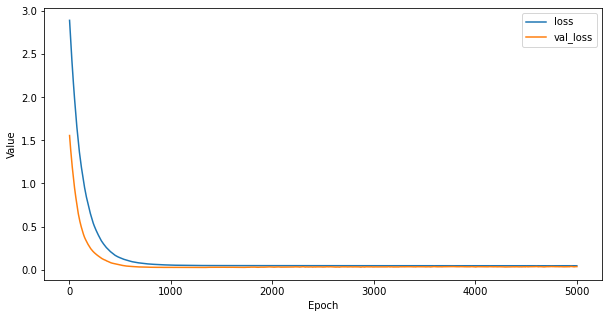

In [77]:
# Ploting the loss curve
list_of_metrics_to_plot = ['loss','val_loss']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

In [62]:
# Here I manually logged some losses and validation losses (2nd and 3rd value)
# Also, at some point started to record number of epochs as well.

pd.DataFrame(history.history)[-1:] 
#       0.210892	0.130479
#       0.196246	0.136061 - media type x jackpot
#       0.189468	0.130921 - longer
#       0.166494	0.121344 - added historic media amounts and aggregations
#4999	0.106878	0.089955 - added OHE indicator for when JP was >100M
#4999	0.078383	0.078421 - JP based on bins
#3999	0.042781	0.05463  - from 5 to 10 bins
#3999	0.037982	0.049124 - include last week ticket sales
#2999	0.036074	0.04352  - couple of new features
#2999	0.000015	0.093211 - DNN
#4999	0.065252	0.095174 - more features and L1 regularization (still NN)
#4999	0.064676	0.084411 - removed 9 features (still NN)
#4999	0.073503	0.094063 - removed 5 more features (still NN)
#4999	0.069786	0.092417 - removed 5, added 9 features (still NN)
#4999	0.0697	0.083075     - removed 5 more features (still NN)
#4999	0.069321	0.080518 - removed 5 more features (still NN) - snapshot 1
#4999	0.080561	0.09812  - removed 5 more features (still NN)
#4999	0.062039	0.083266 - added 1 from last iteration and 30 more (still NN)
#4999	0.077252	0.095138 - removed most of the added features (still NN)
#4999	0.080326	0.108499 - removed 5 more features (still NN)
#4999	0.064326	0.096121 - revert back to snapshot 1
#4999	0.074138	0.086341 - removed 2 more features (still NN)
#4999	0.046408	0.031586 - back to regression

,loss,val_loss
4999,0.045855,0.035559


6/6 [==============================] - 0s 2ms/step


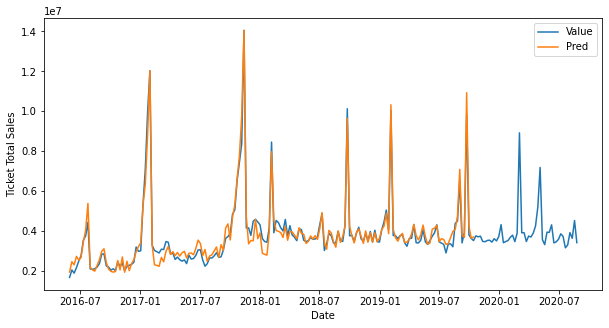

In [78]:
# Ploting the predicted label with actual value to compare the fit and find areas where model should be improved
# In some cases ploting other feature values as well to see what could be imporved upon

def plot_pred():
    plt.figure()
    plt.xlabel("Date")
    plt.ylabel("Ticket Total Sales")
    pred_train_tsf = pd.DataFrame(Reg.predict(X_train_transformed), columns = ["Ticket Total Sales"])
    pred_train = inv_transform_y(pred_train_tsf)
    pred_train_dates = pd.concat([dates[:len(pred_train)],pred_train], axis="columns")
    plt.plot(df["Date"],df["Ticket Total Sales"], label="Value")
    plt.plot(pred_train_dates["Date"],pred_train_dates["Ticket Total Sales"], label="Pred")
    #plt.plot(df["Date"],df["Print Media"]*df["Outdoor Media"]/1000, label="Media")
    plt.legend()
    
plot_pred()

In [83]:
# Printing the feature weights
pd.concat([pd.DataFrame(X_train_transformed.columns,columns=["feature_name"]),pd.DataFrame(np.array(Reg.weights[0]),columns=["weight"])],axis=1)

,feature_name,weight
0,Stores,0.069770
1,National Internet proportion,0.358992
2,Jackpot,0.115746
3,Jackpot x Print,0.372404
4,lead1w TV,-0.021729
5,lead1w Outdoor,-0.049194
6,Stores x Print,-0.106015
7,Stores x TV,0.078963
8,Stores x NIP,-0.011504
9,Outdoor x TV,-0.052860


In [1050]:
# This code I used for measuring the feature importance of deeper neural network models

#class GradientModel(tf.keras.Model):
#    def __init__(self, base_model):
#        super(GradientModel, self).__init__()
#        self.base_model = base_model
#
#    def call(self, inputs):
#        with tf.GradientTape() as tape:
#            tape.watch(inputs)
#            predictions = self.base_model(inputs)
#        gradients = tape.gradient(predictions, inputs)
#        return gradients
#
#gradient_model = GradientModel(Reg)
#
#gradient_model.compile()
#
#gradient_model.fit(X_train_transformed, y_train_tsf,
#                           batch_size=64, epochs=5000, validation_split=0.2)  # Adjust epochs and batch_size as needed
#
#dummy_input = tf.zeros_like(X_train_transformed.to_numpy()[[0]])
#
#gradients = gradient_model(dummy_input)
#
#feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)
#
#feature_importance_np = feature_importance.numpy()
#
#df_importance = pd.DataFrame({'feature': [], 'importance': []})
#
#for i, importance in enumerate(feature_importance_np):
#    df_importance.loc[len(df_importance.index)] = [i+1,importance]  

#pd.concat([pd.DataFrame(features_to_scale + passthrough, columns = ["feature_name"]), df_importance], axis = 1).sort_values("importance", ascending = False)

### Final evaluation using test set (Reg)

In [79]:
# Applying same preprocessing to test data as was used in training phase
X_test_transformed = preprocessor.fit_transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = features_to_scale + passthrough)

y_test_tsf = transform_y(y_test)

In [80]:
# Calculate the loss
Reg.evaluate(X_test_transformed, y_test_tsf)

2/2 [==============================] - 0s 3ms/step - loss: 0.1723


0.17227871716022491

7/7 [==============================] - 0s 2ms/step


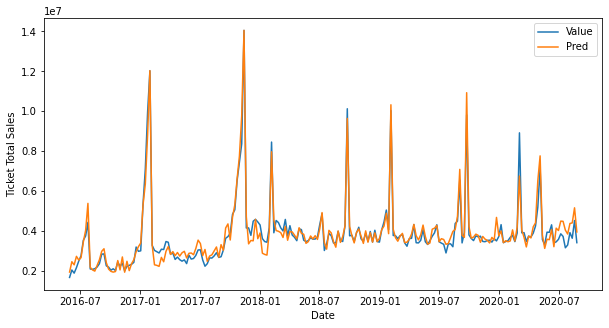

In [103]:
# Using the trained model to predict the label for the whole dataset and compare with actual value
plt.figure()
plt.xlabel("Date")
plt.ylabel("Ticket Total Sales")
# Transforming the whole dataset and predicting the labels
X_tsf = preprocessor.transform(X)
pred_tsf = pd.DataFrame(Reg.predict(X_tsf), columns = ["Ticket Total Sales"])
# Applying the inverse transformation to predicted label
pred = inv_transform_y(pred_train_tsf)
plt.plot(df["Date"],df["Ticket Total Sales"], label="Value")
plt.plot(df["Date"],pred["Ticket Total Sales"], label="Pred")
#plt.plot(df["Date"],df["TV Media"]*10, label="Media")
plt.legend()

### My attempt at trying to describe the regression model (Reg)

In [105]:
# As an example, looking at what happens if all print media is 0
df_p0 = df.copy()
df_p0["Print Media"] = 0 #df_p1["Print Media"] + 1
df_p0.describe()

,Ticket Total Sales,Jackpot (Mil €),Stores,TV Media,Outdoor Media,Print Media,New Store Openings,Friday 13th,National Internet proportion
count,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.0,222.000000,222.000000,222.000000
mean,3.791254e+06,39.747748,4762.945946,22822.890830,2383.122072,0.0,0.063063,0.031532,67.454955
std,1.612257e+06,32.558327,258.548098,28996.444621,8953.843475,0.0,0.662906,0.175144,0.858942
min,1.663031e+06,15.000000,3963.000000,0.000000,0.000000,0.0,0.000000,0.000000,66.000000
25%,3.043159e+06,15.000000,4676.750000,0.000000,0.000000,0.0,0.000000,0.000000,67.000000
50%,3.527098e+06,27.000000,4763.500000,0.000000,0.000000,0.0,0.000000,0.000000,68.000000
75%,3.923637e+06,52.000000,4976.750000,47314.309144,0.000000,0.0,0.000000,0.000000,68.000000
max,1.405333e+07,183.000000,5243.000000,138013.384278,61618.000000,0.0,7.000000,1.000000,69.000000


In [106]:
# Using the function from earlier to calculate X, y and dates with necessary new features and preprocessing the data
X_p0,y_p0,dates_p0 = calc_Xy(df_p0)
X_p0_tsf = preprocessor.transform(X_p0)
X_p0_tsf = pd.DataFrame(X_p0_tsf, columns = features_to_scale + passthrough)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/2604355467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Jackpot"] = X[" Jackpot (Mil €)"]*1000000
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/2604355467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["New Store Openings"] = X["New Store Openings"]/7


7/7 [==============================] - 0s 2ms/step


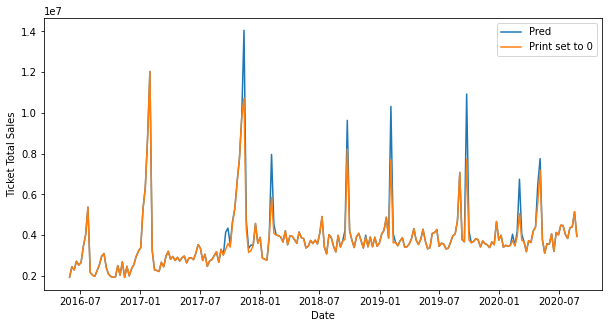

In [107]:
# Ploting the predicted labels from original dataset (defined in few cells above) with the new predicted labels,
# where print media was set to 0
plt.figure()
plt.xlabel("Date")
plt.ylabel("Ticket Total Sales")

plt.plot(df["Date"],pred["Ticket Total Sales"], label="Pred")

pred_print_tsf = pd.DataFrame(Reg.predict(X_p0_tsf), columns = ["Ticket Total Sales"])
pred_print = inv_transform_y(pred_print_tsf)
plt.plot(df["Date"],pred_print["Ticket Total Sales"], label="Print set to 0")

plt.legend()

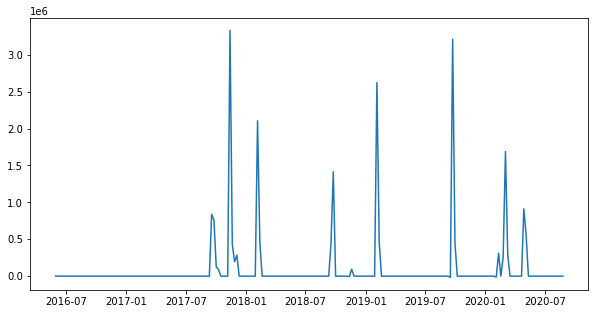

In [109]:
# Ploting the difference
plt.plot(df["Date"],pred["Ticket Total Sales"] - pred_print["Ticket Total Sales"])

At this point I decided to try to solve the task with random forrest model.

## Random Forrest

Importing necessary packages for building the random forrest model.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

Baseline factor:  1.0
Sample:  7


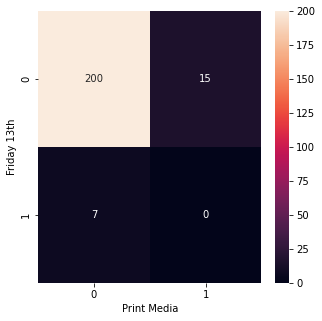

In [111]:
# Defining confusion matrix plot
# I used that to analyse how often different feature products have non-zero value.
def plot_cm(baseline_label,media_label):
    cm = confusion_matrix(df[baseline_label] > 0, df[media_label] > 0)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel(baseline_label)
    plt.xlabel(media_label)

  
    print("Baseline factor: ", cm[1][0]/(cm[1][1]+cm[1][0]))
    print("Sample: ", cm[1][1]+cm[1][0])
plot_cm("Friday 13th","Print Media")

### Preparing data for training (RF)

The following function `RF_calc_Xy` was used much like the earlier verion `calc_Xy` from regression model for feature engineering.

In [205]:
"""
Here, similarly to regression model from earlier, number of bins that the jackpot is sorted into is given 
as sort of hyper-paramter. Altough in the case of random forrest, the model is already doing similar kind of thing, I still
found that was beneficial to divide the jackpot into two separate values. Also, in this case I did the feature products 
more dynamically. As a result of this I had to include the original dataframe in the function call to make sure the dynamic 
rule works for changed dataframe as well.
""" 

num_bins = 2
def RF_calc_Xy(df, num_bins = 10, df_orig = df):
    
    # Setting date aside. This will be returned for easier plotting if the argument df doesn't include the whole time provided
    dates = df[["Date"]]
    
    # Assigning label to y
    y = df[["Ticket Total Sales"]]
    
    # Assigning features to X and X_orig where the unchanged or comparison data is held
    X = df[[" Jackpot (Mil €)","Stores","TV Media","Outdoor Media","Print Media","New Store Openings","Friday 13th","National Internet proportion"]]
    X_orig = df_orig[[" Jackpot (Mil €)","Stores","TV Media","Outdoor Media","Print Media","New Store Openings","Friday 13th","National Internet proportion"]]
    
    # Calculating different kinds of media feature combinations
    X["Outdoor x TV"] = X["Outdoor Media"] * X["TV Media"]
    X["Print x Outdoor"] = X["Print Media"] * X["Outdoor Media"] 
    X["TV x Print"] = X["TV Media"] * X["Print Media"] 
    X["TV x Print x Outdoor"] = X["TV Media"] * X["Print Media"] * X["Outdoor Media"] 
    X['lead1w TV'] = X['TV Media'].shift(1).fillna(0) 
    X['lead1w Outdoor'] = X['Outdoor Media'].shift(1).fillna(0)
    X['lead1w Print'] = X['Print Media'].shift(1).fillna(0) 
    
    X_orig["Outdoor x TV"] = X_orig["Outdoor Media"] * X_orig["TV Media"] 
    X_orig["Print x Outdoor"] = X_orig["Print Media"] * X_orig["Outdoor Media"] 
    X_orig["TV x Print"] = X_orig["TV Media"] * X_orig["Print Media"] 
    X_orig["TV x Print x Outdoor"] = X_orig["TV Media"] * X_orig["Print Media"] * X_orig["Outdoor Media"] 
    X_orig['lead1w TV'] = X_orig['TV Media'].shift(1).fillna(0) 
    X_orig['lead1w Outdoor'] = X_orig['Outdoor Media'].shift(1).fillna(0)
    X_orig['lead1w Print'] = X_orig['Print Media'].shift(1).fillna(0) 
    
    # List of different media features
    media_labels = ["TV Media","Outdoor Media","Print Media",
                    "Outdoor x TV","Print x Outdoor","TV x Print",
                    "TV x Print x Outdoor",
                    "lead1w TV",'lead1w Outdoor','lead1w Print']
    
    # Scaling New Store Opening
    X["New Store Openings"] = X["New Store Openings"]/7
    
    # Calculating the bins based on the number of bins parameter
    max_jp = max(X[" Jackpot (Mil €)"])
    step = int(round(max_jp/num_bins,0))
    for x in range(0,max_jp,step):
        
        # Calculating the bin values for current as well as two earlier weeks
        X["Jackpot {}".format(x)] = ((x<X[" Jackpot (Mil €)"])*(X[" Jackpot (Mil €)"]<=x+step)).astype(int)*X[" Jackpot (Mil €)"]*1000000
        X["-1 week Jackpot {}".format(x)] = (x<(X[" Jackpot (Mil €)"].shift(1).fillna(0))*(X[" Jackpot (Mil €)"].shift(1).fillna(0)<=x+step)).astype(int)*X[" Jackpot (Mil €)"].shift(1).fillna(0)*1000000
        X["-2 week Jackpot {}".format(x)] = (x<(X[" Jackpot (Mil €)"].shift(2).fillna(0))*(X[" Jackpot (Mil €)"].shift(2).fillna(0)<=x+step)).astype(int)*X[" Jackpot (Mil €)"].shift(2).fillna(0)*1000000
        
        # Calculating the product of two and three consecutive weeks if they stayed in same bin
        X["Two week Jackpot {}".format(x)] = X["Jackpot {}".format(x)]*X["-1 week Jackpot {}".format(x)]
        X["Three week Jackpot {}".format(x)] = X["Jackpot {}".format(x)]*X["-1 week Jackpot {}".format(x)]*X["-2 week Jackpot {}".format(x)]
        
        """
        Here, going through media features and if the jackpot bin is non-zero on at least 10 weeks 
        (issue with larger number of bins) and the feature product is zero (or equivalently non-zero)
        on 30% to 70% of those weeks, then iclude the product. The logic here was that, if the product has
        too few non-zero values, it could be used to interpret some random noice, and if too much of the
        underlying bin was covered by that, some of the effect of jackpot could be unjustly attributed to 
        the product and thus marketing. In short, there should be some comparison to "normality" if media feature
        product is used.
        """
        for ml in media_labels:
            cm = confusion_matrix(X["Jackpot {}".format(x)] > 0, X_orig[ml] > 0)
            bl = cm[1][1]+cm[1][0]
            if bl > 9 and 0.3 < cm[1][0]/bl and cm[1][0]/bl < 0.7:
                X["Jackpot {} x {}".format(x,ml)] = X["Jackpot {}".format(x)] * X[ml]
    
    #Take into account last week and previous week ticket sales
    X["Last week ticket sales"] = df[["Ticket Total Sales"]].shift(1).fillna(0)
    X["Before Last week ticket sales"] = df[["Ticket Total Sales"]].shift(2).fillna(0)
    
    #Exclude two first weeks of any dataset as some new features have 0 where we have missing data
    return X.iloc[2: , :],y.iloc[2: , :],dates.iloc[2: , :]

# Calculate X, y and dates for initial dataframe
X,y,dates = RF_calc_Xy(df, num_bins = num_bins)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Outdoor x TV"] = X["Outdoor Media"] * X["TV Media"]
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_orig["Outdoor x TV"] = X_orig["Outdoor Media"] * X_orig["TV Media"]


In [206]:
# Defining function that uses train_test_split twice as random forrest regressor doesn't validation set option
def split_train_val_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(X,y)

### Defining the model (RF)

In [207]:
RF = RandomForestRegressor(n_estimators = 100, criterion = "mse",min_samples_split = 2,
                           min_samples_leaf = 1, max_features = 0.5, bootstrap = True, max_depth = None)

### Training the model (RF)

In [208]:
RF.fit(X_train,y_train.to_numpy())

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/1527551518.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train.to_numpy())


RandomForestRegressor(max_features=0.5)

### Assessing model performace (RF)

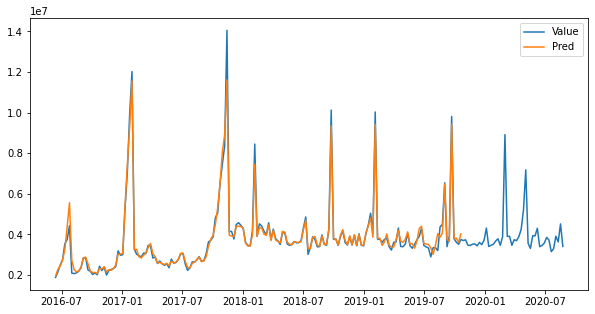

In [209]:
# Ploting the predicted values against actual label
X_train_val = pd.concat([X_train,X_val], axis = 0)
X_train_val_predict = RF.predict(X_train_val)
plt.plot(dates,y, label = "Value")
plt.plot(dates[:len(X_train_val)],X_train_val_predict,label = "Pred")
#plt.plot(dates[:len(X_train_val)],X_train_val["Jackpot 92"]/100)

plt.legend()

In [210]:
# Printing the features in the order of importance
pd.concat([pd.DataFrame(X.columns, columns=["Feature name"]),pd.DataFrame(RF.feature_importances_, columns=["Importance"])], axis=1).sort_values("Importance", ascending=False)

,Feature name,Importance
22,Jackpot 92,0.277420
0,Jackpot (Mil €),0.270408
30,Last week ticket sales,0.101895
15,Jackpot 0,0.078408
31,Before Last week ticket sales,0.045860
25,Two week Jackpot 92,0.044040
26,Three week Jackpot 92,0.038952
1,Stores,0.019933
18,Two week Jackpot 0,0.019399
17,-2 week Jackpot 0,0.014967


In [211]:
model_info = RF.get_params()

In [212]:
# Here, I collected the scores of different runs, not all, with records on different hyper-parameters that were important to me
# Altough this only works in the context of one enirovnment, I included the results of my testing in the GitHub page 
# in run_info.txt. This code cell initialised my little list of runs and the following added new records based on current state.

run_info = [{"id": 1, "value": model_info}]
i = 1

In [213]:
i += 1
# Getting different parameters that where important for me to record
model_info = {k: v for k, v in RF.get_params().items() if k in ["max_depth","max_features","max_leaf_nodes",
                                                                "min_impurity_decrease","min_samples_leaf",
                                                                "min_samples_split","n_estimators","n_jobs"]}
model_info.update({"n_features": RF.n_features_in_})
model_info.update({"training_score": RF.score(X_train, y_train)})
model_info.update({"valuation_score": RF.score(X_val, y_val)})
model_info.update({"num_bins": num_bins})
# Inserting new dictionary to the list
run_info.insert(0,{"id": i, "value": model_info})

In [214]:
run_info

[{'id': 2,
  'value': {'max_depth': None,
   'max_features': 0.5,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100,
   'n_jobs': None,
   'n_features': 32,
   'training_score': 0.973030353671986,
   'valuation_score': 0.9463304557680803,
   'num_bins': 2}},
 {'id': 1,
  'value': {'bootstrap': True,
   'ccp_alpha': 0.0,
   'criterion': 'mse',
   'max_depth': None,
   'max_features': 0.5,
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 100,
   'n_jobs': None,
   'oob_score': False,
   'random_state': None,
   'verbose': 0,
   'warm_start': False}}]

[Text(1771.0027472527472, 2348.8888888888887, 'Jackpot 92 <= 116500000.0\nmse = 3482512867874.082\nsamples = 89\nvalue = 3919504.253'),
 Text(1116.510989010989, 2214.6666666666665, 'Before Last week ticket sales <= 2965448.5\nmse = 763418815761.83\nsamples = 84\nvalue = 3556110.451'),
 Text(374.7252747252747, 2080.4444444444443, 'Last week ticket sales <= 2300782.0\nmse = 151845822165.788\nsamples = 26\nvalue = 2651908.156'),
 Text(231.64835164835165, 1946.2222222222222, ' Jackpot (Mil €) <= 43.0\nmse = 26213541656.388\nsamples = 10\nvalue = 2220888.972'),
 Text(163.5164835164835, 1812.0, 'Jackpot 0 x lead1w TV <= 2702761459712.0\nmse = 16219546018.952\nsamples = 6\nvalue = 2128563.33'),
 Text(136.26373626373626, 1677.7777777777778, 'Outdoor Media <= 4444.45\nmse = 6780286402.707\nsamples = 5\nvalue = 2170212.403'),
 Text(81.75824175824175, 1543.5555555555557, '-2 week Jackpot 0 <= 45500000.0\nmse = 4025314913.009\nsamples = 3\nvalue = 2103370.851'),
 Text(54.505494505494504, 1409.3333

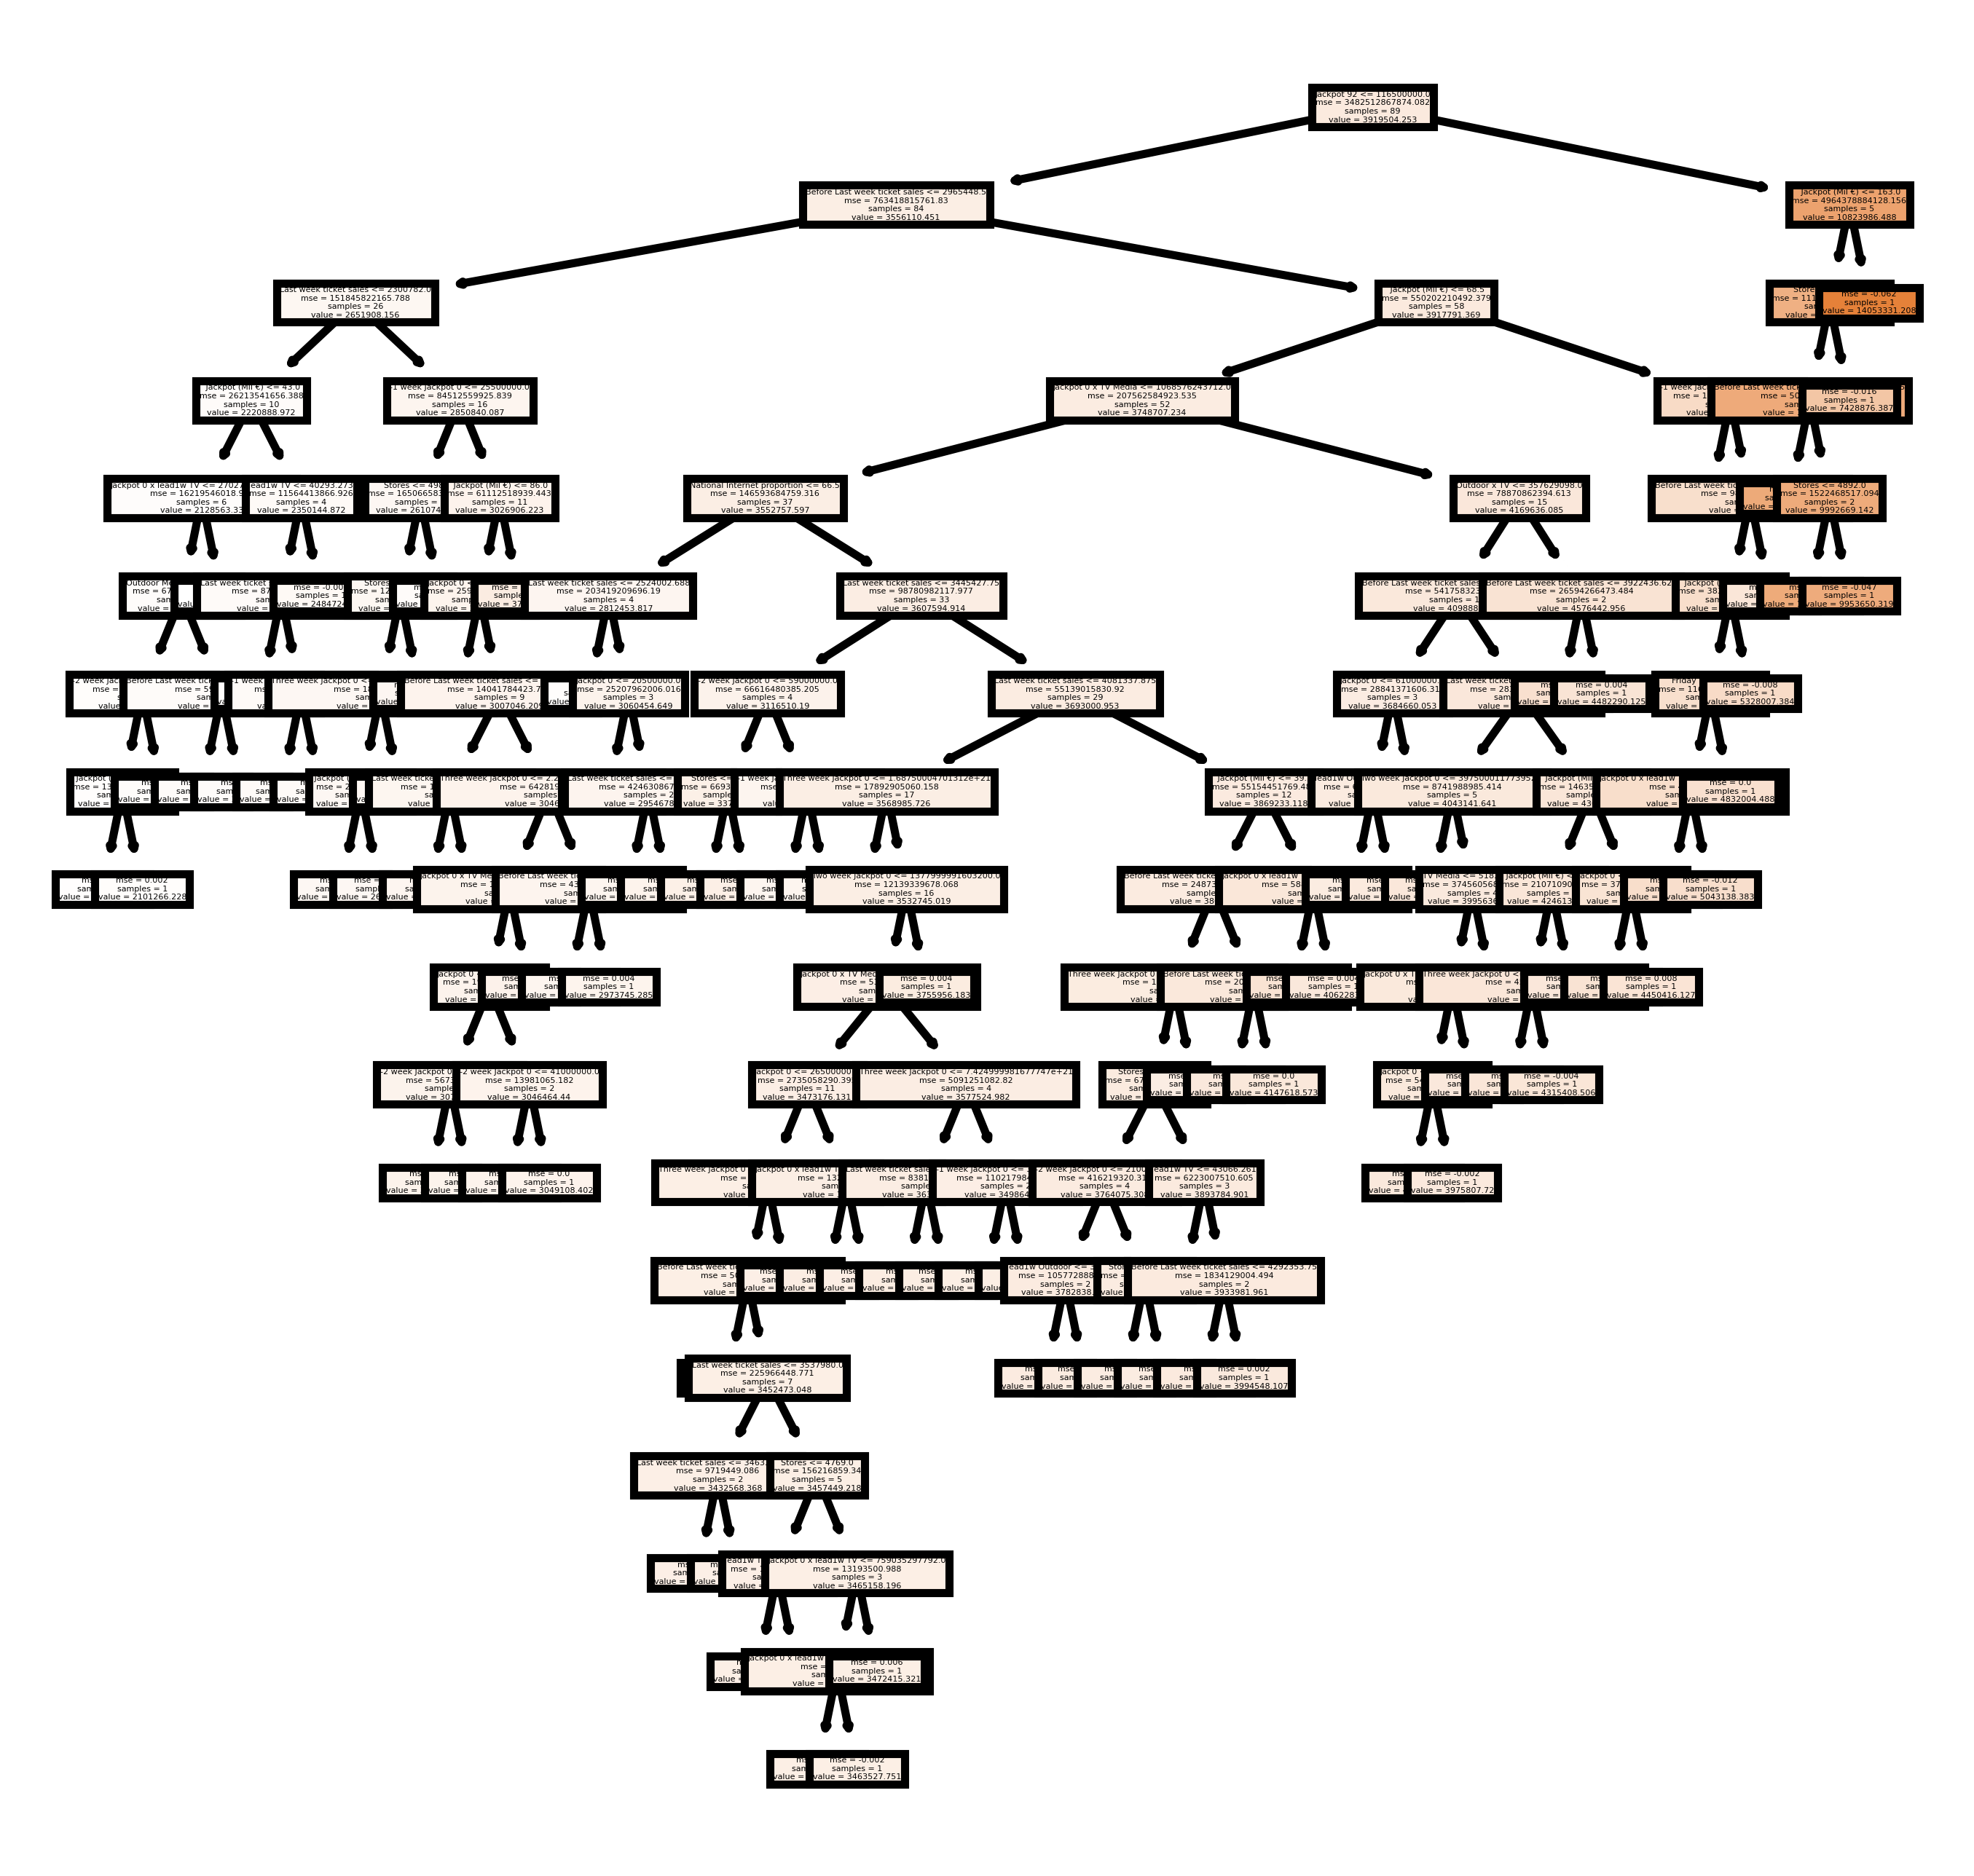

In [215]:
# Ploting a tree from the forrest, to get some idea of the scale and shape of the tree.
fn=X.columns
cn=y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(RF.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)

### Final evaluation using test set (RF)

In [216]:
RF.score(X_test,y_test)

0.8081725380683137

### Describing media marketing impact based on the model

General approach was the same for all of them - firstly, setting the type of media to 0 and seeing how the predicted values change. And secondly, applying more detailed change, zeroing the media investment values for only the cases where they seemed to have most impact. Then calculating ROI based on the model outcome. Here, I commented out some lines to run one or another type of test, of course this could be rewritten to run more smoothly.

In [217]:
# Setting the baseline model
X_predict = RF.predict(X)

#### Print Media ROI

In [218]:
df_p0 = df.copy()
#df_p0["Print Media"] = 0 #type 1 test
df_p0["Print Media"] = df_p0["Print Media"]*(df[" Jackpot (Mil €)"]<=92).astype(int) #type 2 test
X_p0,y_p0,dates_p0 = RF_calc_Xy(df_p0, num_bins = num_bins)
X_p0_predict = RF.predict(X_p0)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Outdoor x TV"] = X["Outdoor Media"] * X["TV Media"]
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_orig["Outdoor x TV"] = X_orig["Outdoor Media"] * X_orig["TV Media"]


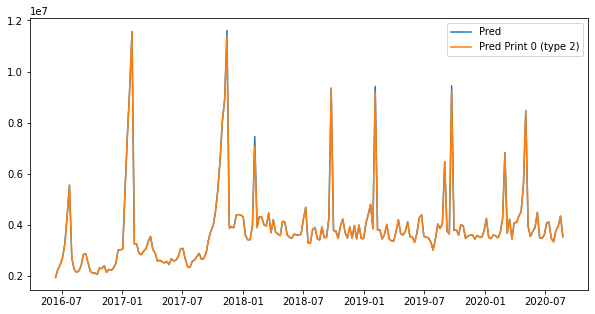

In [219]:
plt.plot(dates,X_predict,label = "Pred")
#plt.plot(dates_p0,X_p0_predict,label = "Pred Print 0 (type 1)")
plt.plot(dates_p0,X_p0_predict,label = "Pred Print 0 (type 2)")

plt.legend()

In [220]:
#pm_mc = sum(df.iloc[2: , :]["Print Media"]) #type 1 test
pm_mc = sum(df.iloc[2: , :][92<df.iloc[2: , :][" Jackpot (Mil €)"]]["Print Media"]) #type 2 test
pm_sales = sum(X_predict-X_p0_predict)
pm_roi = (pm_sales-pm_mc)/pm_mc
print("Print Media increased sales by {:0.2f}€ for every 1€ spent on marketing (ROI: {:0.0f}).".format(pm_sales/pm_mc,pm_roi))

Print Media increased sales by 1.82€ for every 1€ spent on marketing (ROI: 1).


#### TV Media ROI

In [221]:
df_t0 = df.copy()
#df_t0["TV Media"] = 0 #type 1 test
df_t0["TV Media"] = df_t0["TV Media"]*(92<df[" Jackpot (Mil €)"]).astype(int) #type 2 test
X_t0,y_t0,dates_t0 = RF_calc_Xy(df_t0, num_bins = num_bins)
X_t0_predict = RF.predict(X_t0)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Outdoor x TV"] = X["Outdoor Media"] * X["TV Media"]
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_orig["Outdoor x TV"] = X_orig["Outdoor Media"] * X_orig["TV Media"]


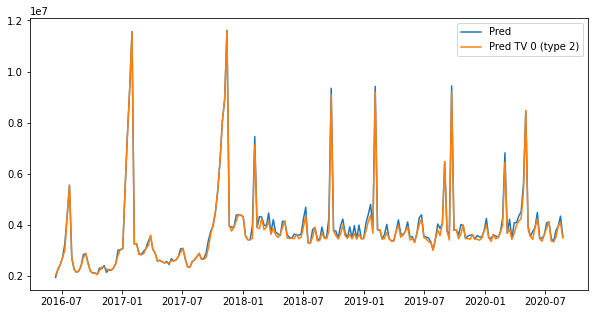

In [222]:
plt.plot(dates,X_predict,label = "Pred")
#plt.plot(dates_t0,X_t0_predict,label = "Pred TV 0 (type 1)")
plt.plot(dates_t0,X_t0_predict,label = "Pred TV 0 (type 2)")

plt.legend()

In [223]:
#tm_mc = sum(df.iloc[2: , :]["TV Media"]) #type 1 test
tm_mc = sum(df.iloc[2: , :][92>=df.iloc[2: , :][" Jackpot (Mil €)"]]["TV Media"]) #type 2 test
tm_sales = sum(X_predict-X_t0_predict)
tm_roi = (tm_sales-tm_mc)/tm_mc
print("TV Media increased sales by {:0.2f}€ for every 1€ spent on marketing (ROI: {:0.0f}).".format(tm_sales/tm_mc,tm_roi))

TV Media increased sales by 4.47€ for every 1€ spent on marketing (ROI: 3).


#### Outdoor Media ROI

In [224]:
df_o0 = df.copy()
#df_o0["Outdoor Media"] = 0 #type 1 test
df_o0["Outdoor Media"] = df_o0["Outdoor Media"]*(df[" Jackpot (Mil €)"]<=92).astype(int) #type 2 test
X_o0,y_o0,dates_o0 = RF_calc_Xy(df_o0, num_bins = num_bins)
X_o0_predict = RF.predict(X_o0)

C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Outdoor x TV"] = X["Outdoor Media"] * X["TV Media"]
C:\Users\georgs\AppData\Local\Temp/ipykernel_25892/4144962223.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_orig["Outdoor x TV"] = X_orig["Outdoor Media"] * X_orig["TV Media"]


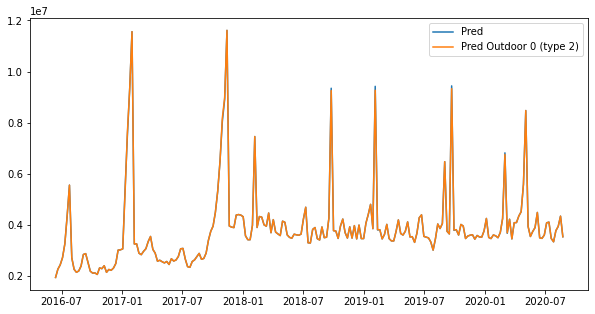

In [225]:
plt.plot(dates,X_predict,label = "Pred")
#plt.plot(dates_o0,X_o0_predict,label = "Pred Outdoor 0 (type 1)")
plt.plot(dates_o0,X_o0_predict,label = "Pred Outdoor 0 (type 2)")

plt.legend()

In [226]:
#om_mc = sum(df.iloc[2: , :]["Outdoor Media"]) #type 1 test
om_mc = sum(df.iloc[2: , :][92<df.iloc[2: , :][" Jackpot (Mil €)"]]["Outdoor Media"]) #type 2 test
om_sales = sum(X_predict-X_o0_predict)
om_roi = (om_sales-om_mc)/om_mc
print("Outdoor Media increased sales by {:0.2f}€ for every 1€ spent on marketing (ROI: {:0.0f}).".format(om_sales/om_mc,om_roi))

Outdoor Media increased sales by 0.84€ for every 1€ spent on marketing (ROI: -0).
